# Week 3 - Using statistics to summarise datasets

This is a Jupyter notebook to explore the material in (Ross, 2017, Chp. 3) with the use of Python. 



In [1]:
%matplotlib inline
# from now on we'll start each notebook with the library imports
# and special commands to keep these things in one place (which
# is good practice). The line above is jupyter command to get 
# matplotlib to plot inline (between cells)
# Next we import the libraries and give them short names
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter

## Some data-sets

We will be making use of a number of datasets in this notebook, and so we define them here to make them accessible throughout.

In [2]:


# for illustrative purposes we have removed or added some the values from some of the datasets
# below compared to the original versions in (Ross, 2017)
# anonymous values based on those from (Ross, 2017, p. 86, Q8)
anon_data = np.array([75, 55, 21, 46, 98, 103, 88, 35, 22, 29, 73, 37, 121, 144, 133,
    52, 54, 63, 21, 7])
# some values from (Ross, 2017, Ex. 3.11)
league_bowling_scores = np.array([122, 126, 133, 140, 145, 145, 149, 150, 157, 162, 166,
    175, 177, 177, 183, 188, 199, 212])
# some ages at death as given in obituaries of the New York Times August 1, 2013 as
# presented in (Ross, 2017, p. 86, Q0)
obituary_data = [92, 90, 92, 74, 74, 69, 80, 94, 98, 65, 96, 84, 69, 86, 91, 88, 74,
    97, 85, 88, 68, 77, 94, 88, 65, 76, 75, 60, 69, 97, 92, 85, 70, 80, 93, 91,
    68, 82, 78, 89]


# From (Ross, 2017, p. 82) explanation for 90th percentile
example1_data = np.arange(1,13)
example2_data = np.arange(1,21)
# The above datasets are constructed so that the values equal the index
# e.g. [v1, v2,...] = [1, 2, ...]
# In particular, they are to check that the 90th percentile is as calculated on p. 82

# for ease of reference we'll put each dataset in a dictionary
datasets = dict([
    ("Anonymous", anon_data), ("League Bowling", league_bowling_scores),
    ("Obituary", obituary_data), ("Example 1", example1_data),
    ("Example 2", example2_data)])

## Exercise A: Mean

The mean is probably the most widely used and understood form of averaging. We can average any collection with the following function:


In [3]:
def calc_mean_first_attempt(data):
    n = len(data)
    tot = 0
    for x in data:
        tot += x
    return tot/n
        


we can simplify this if we allow ourselves to use <code>numpy.array</code> objects.

In [4]:
def calc_mean(data):
    data = np.array(data)
    return np.sum(data)/data.size

In fact we can just use the library function <code>numpy.mean</code>.
`
All the above methods are applied to some of our data-sets defined at the beginning of the notebook. <code>numpy.sum</code> and <code>numpy.mean</code> are both described as "reductions" in the Numpy documentation. There is an informative explanation [here](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions).

In [5]:
for name in ["Anonymous", "League Bowling", "Obituary"]:
    data = datasets[name]
    print(f"Means for {name} Data:")
    print(f"\tcalc_mean_first_attempt(data) = {calc_mean_first_attempt(data)}")
    print(f"\tcalc_mean(data) = {calc_mean(data)}")
    print(f"\tnp.mean(data) = {np.mean(data)}")
    print("") # newline
    
    

Means for Anonymous Data:
	calc_mean_first_attempt(data) = 63.85
	calc_mean(data) = 63.85
	np.mean(data) = 63.85

Means for League Bowling Data:
	calc_mean_first_attempt(data) = 161.44444444444446
	calc_mean(data) = 161.44444444444446
	np.mean(data) = 161.44444444444446

Means for Obituary Data:
	calc_mean_first_attempt(data) = 82.075
	calc_mean(data) = 82.075
	np.mean(data) = 82.075



### Means from frequency tables

Below is the frequency count data for the severity of motorcyle accidents from (Weiss, 1992) as reported in (Ross, 2017, p. 70). Note that there are three variables, one list of severity types, one list of frequencies of accidents with helmets and one set of frequencies without helmets.

Write a function <code>calc_mean_from_frequencies</code> that takes two inputs: values and frequency counts, and produces a mean based on this. Then apply this to the data to give two sample means. There is more than one way to do this, but you might want to consider calculating the weights first then performing a weighted average with elementwise multiplication and then summing the terms using <code>np.sum</code>. You can read up on elementwise operations [here](https://scipy-lectures.org/intro/numpy/operations.html#elementwise-operations). As mentioned before, <code>numpy.sum</code> is what is described as a reduction, and you can read up more about reductions [here](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions).

In [6]:
severities = np.arange(7)
with_helmet = np.array([248, 58, 11, 3, 2, 8, 1])
without_helmet = np.array([227, 135, 33, 14, 3, 21, 6])

age = np.array([16,17,18,19,20])
count = np.array([9,12,15,10,8])

def calc_mean_from_frequencies(values, frequencyCounts):
    weights = np.multiply(values, frequencyCounts)
    print(weights)
    
    sum_weights = np.sum(weights)
    print(sum_weights)
    
    divisor = np.sum(frequencyCounts)
    print(divisor)
    
    mean = sum_weights/divisor
    
    return mean


print(severities)
print(with_helmet)
print(without_helmet)
print("\n")


helmet = calc_mean_from_frequencies(severities, with_helmet)
print(f"Helmet Mean = {helmet}")

print("\n")

no_helmet = calc_mean_from_frequencies(severities, without_helmet)
print(f"No Helmet Mean = {no_helmet}")

print("\n")

quiz3mean = calc_mean_from_frequencies(age, count)
print(f"Quiz 3 Mean = {quiz3mean}")



[0 1 2 3 4 5 6]
[248  58  11   3   2   8   1]
[227 135  33  14   3  21   6]


[ 0 58 22  9  8 40  6]
143
331
Helmet Mean = 0.43202416918429004


[  0 135  66  42  12 105  36]
396
439
No Helmet Mean = 0.9020501138952164


[144 204 270 190 160]
968
54
Quiz 3 Mean = 17.925925925925927


## Exercise B: Median and Mode

Now try writing functions for the median and the mode too, first from raw observations and then from frequency count data. You can use any functions from the <code>numpy</code> library you like, except for <code>numpy.median</code>. Compare your results for the median with <code>numpy.median</code> on the data-sets you have already seen.


In [7]:
## Median functions
## to complete

# FREQUENCY COUNT DATA FUNCTION
def median_fc(values, frequencyCounts):
    x = [item for item, count in zip(values, frequencyCounts) for i in range(count)]
    median = median_ro(x)
    return median

# RAW OBSERVATION FUNCTION
def median_ro(data):
    n = len(data)
    data.sort()
  
    if n % 2 == 0:
        median1 = data[n//2] 
        median2 = data[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = data[n//2] 
    return print("Median is = " + str(median)) 


In [8]:
## Mode functions
## to complete
import collections

# FREQUENCY COUNT DATA FUNCTION
def mode_fc(values, frequencyCounts):
    x = [item for item, count in zip(values, frequencyCounts) for i in range(count)]
    mode = mode_ro(x)
    return mode

# RAW OBSERVATION FUNCTION
def mode_ro(num_list):
    
    data = collections.Counter(num_list)
    data_list = dict(data)
    
    max_value = max(list(data.values()))
    mode_val = [num for num, freq in data_list.items() if freq == max_value]
    
    if len(mode_val) == len(num_list):
        print("No mode in the list")
    else:
        print("The Mode of the list is : " + ', '.join(map(str, mode_val)))
    return mode_val


In [9]:
## Apply functions to obituary data
## to complete

# MEDIAN FOR OBITUARY DATA (RAW OBERSERVATION DATA)
median_ro(obituary_data)

# USING NP MEDIAN FUNCTION
x = np.median(obituary_data)
print(f"Median using median() is = {x}")

# MODE FOR OBITUARY DATA (RAW OBERSERVATION DATA)
mode_ro(obituary_data)


Median is = 84.5
Median using median() is = 84.5
The Mode of the list is : 69, 74, 88, 92


[69, 74, 88, 92]

In [10]:
## apply functions to motorcycle accident severity data
## to complete

# MEDIAN FOR MOTORCYCLE ACCIDENT SEVERITY DATA (FREQUENCY COUNT DATA)
median_fc(severities, with_helmet)

# MODE FOR MOTORCYCLE ACCIDENT SEVERITY DATA (FREQUENCY COUNT DATA)
mode_fc(severities, with_helmet)


Median is = 0
The Mode of the list is : 0


[0]

In [11]:
# Quiz 3 Mode Median

# Mode
mode_fc(age, count)

# Median 
median_fc(age, count)

The Mode of the list is : 18
Median is = 18.0


In [14]:
mdata1 = [1,4,9,10,13,13,15,16,18,19]
print(median_ro(mdata1))

Median is = 13.0
None


## Exercise C: Sample 100p percentile
Here we can use one of two methods. The first we construct ourselves using the sorting functionality along with the ceil and floor functions. 

Below are three data-sets. For each find the 3rd percentile, the 45th percentile and the 90th percentile. To do this you will need to write a function that given a data-set and a value $0 < p < 1$ as arguments, calculates and returns the 100p percentile, then call this function on the three data-sets with each of the appropriate p values and output the results. 

In [34]:
## writing your own function to calculate sample 100p percentile
## to complete

def percentile_calculator(data, perc):
    a_list = sorted(list(data))
#     print(a_list)
    length = len(a_list)
#     print(length)
    pth = round(length*perc)
#     print(pth)
    return a_list[pth]


# ANON_DATA 3RD 45TH 90TH
a = percentile_calculator(anon_data, 0.03)
print(f"anon_data 3rd percentile is = {a}")
b = percentile_calculator(anon_data, 0.45)
print(f"anon_data 45th percentile is = {b}")
c = percentile_calculator(anon_data, 0.90)
print(f"anon_data 90rd percentile is = {c}")

print("\n")

# LEAGUE_BOWLING_SCORES 3RD 45TH 90TH
a = percentile_calculator(league_bowling_scores, 0.03)
print(f"league_bowling_scores 3rd percentile is = {a}")
b = percentile_calculator(league_bowling_scores, 0.45)
print(f"league_bowling_scores 45th percentile is = {b}")
c = percentile_calculator(league_bowling_scores, 0.90)
print(f"league_bowling_scores 90rd percentile is = {c}")

print("\n")

# OBITUARY_DATA 3RD 45TH 90TH
a = percentile_calculator(obituary_data, 0.03)
print(f"obituary_data 3rd percentile is = {a}")
b = percentile_calculator(obituary_data, 0.45)
print(f"obituary_data 45th percentile is = {b}")
c = percentile_calculator(obituary_data, 0.90)
print(f"obituary_data 90rd percentile is = {c}")

anon_data 3rd percentile is = 21
anon_data 45th percentile is = 54
anon_data 90rd percentile is = 133


league_bowling_scores 3rd percentile is = 126
league_bowling_scores 45th percentile is = 157
league_bowling_scores 90rd percentile is = 199


obituary_data 3rd percentile is = 65
obituary_data 45th percentile is = 82
obituary_data 90rd percentile is = 96


The second approach to find the percentile values uses the library function <code>numpy.percentile</code>. However, the second method requires an appropriate choice for the <code>interpolation</code> input parameter. Look up the function's documentation and determine what values this can take. Now re-run this on the 3 data-sets from above and the two simple example datasets from below and check  which value for <code>interpolation</code> (if any) gives the same answers as your other function above.

In [25]:
## to complete

def percentile_calculator2(data, perc):
    a_list = np.sort(np.array(data))
    percentileVal = np.percentile(a_list, perc, interpolation = 'higher')
    return percentileVal


# ANON_DATA 3RD 45TH 90TH
a = percentile_calculator2(anon_data, 3)
print(f"anon_data 3rd percentile is = {a}")
b = percentile_calculator2(anon_data, 45)
print(f"anon_data 45th percentile is = {b}")
c = percentile_calculator2(anon_data, 90)
print(f"anon_data 90rd percentile is = {c}")

print("\n")

# LEAGUE_BOWLING_SCORES 3RD 45TH 90TH
a = percentile_calculator2(league_bowling_scores, 3)
print(f"league_bowling_scores 3rd percentile is = {a}")
b = percentile_calculator2(league_bowling_scores, 45)
print(f"league_bowling_scores 45th percentile is = {b}")
c = percentile_calculator2(league_bowling_scores, 90)
print(f"league_bowling_scores 90rd percentile is = {c}")

print("\n")

# OBITUARY_DATA 3RD 45TH 90TH
a = percentile_calculator2(obituary_data, 3)
print(f"obituary_data 3rd percentile is = {a}")
b = percentile_calculator2(obituary_data, 45)
print(f"obituary_data 45th percentile is = {b}")
c = percentile_calculator2(obituary_data, 90)
print(f"obituary_data 90rd percentile is = {c}")


# 'linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’ - out of these interpolation = ‘higher’ is the closes to my function above

anon_data 3rd percentile is = 21
anon_data 45th percentile is = 54
anon_data 90rd percentile is = 133


league_bowling_scores 3rd percentile is = 126
league_bowling_scores 45th percentile is = 157
league_bowling_scores 90rd percentile is = 199


obituary_data 3rd percentile is = 65
obituary_data 45th percentile is = 82
obituary_data 90rd percentile is = 96


In [36]:
quiz3data = [3.71, 4.23, 4.16, 2.98, 3.23, 4.67, 3.99, 5.04, 4.55, 3.24, 2.80, 3.44, 3.27, 2.66, 2.95, 4.70, 5.12, 3.77, 3.12, 2.38, 4.57, 3.88, 2.97, 3.70, 2.53, 2.67, 4.12, 4.80, 3.55, 3.86, 2.51, 3.33, 3.85, 2.35, 3.12, 4.39, 5.09, 3.38, 2.73, 3.07]
sor = sorted(quiz3data)
print(sor)
a3 = percentile_calculator2(quiz3data, 25)
print(f"LQ = {a3}")
b3 = percentile_calculator2(quiz3data, 75)
print(f"UQ = {b3}")
iqrquiz3 = b3 - a3
print(f"IRQ = {iqrquiz3}")

[2.35, 2.38, 2.51, 2.53, 2.66, 2.67, 2.73, 2.8, 2.95, 2.97, 2.98, 3.07, 3.12, 3.12, 3.23, 3.24, 3.27, 3.33, 3.38, 3.44, 3.55, 3.7, 3.71, 3.77, 3.85, 3.86, 3.88, 3.99, 4.12, 4.16, 4.23, 4.39, 4.55, 4.57, 4.67, 4.7, 4.8, 5.04, 5.09, 5.12]
LQ = 2.98
UQ = 4.23
IRQ = 1.2500000000000004


## Exercise D: Variance and Standard deviation
Again there are library functions from Numpy for these calculations, but before we use them, convince yourself that you understand the definitions by writing these in terms of more primitive functions. Think about calculating first the mean then the deviations of the data.

For this, you can use the existing Numpy functions <code>numpy.sum</code>, <code>numpy.mean</code>, <code>numpy.sqrt</code> and the elementwise arithmetic operations  <code>+</code>, <code>-</code>, <code>*</code>, <code>/</code> and <code>**</code> (to the power of). If you are unclear by what is meant by elementwise operations, then try reading [this](https://scipy-lectures.org/intro/numpy/operations.html#elementwise-operations) explanation.

Optional: If you fancy a bit more practice, try implementing the mean absolute deviation and the inter-quartile range too.

In [37]:
## write functions that calculate the variance and standard deviation of data
## to complete

def variance1(data):
    mean_data = sum(data) / len(data)
    vari = sum((x-mean_data)**2 for x in data) / len(data)
    return vari

def sd1(data):
    var = variance1(data)
    std = var ** 0.5
    return std
                    
x = [1,2,3] 
print(variance1(x))
print(sd1(x))

0.6666666666666666
0.816496580927726


In [39]:
quiz3data = [3.71, 4.23, 4.16, 2.98, 3.23, 4.67, 3.99, 5.04, 4.55, 3.24, 2.80, 3.44, 3.27, 2.66, 2.95, 4.70, 5.12, 3.77, 3.12, 2.38, 4.57, 3.88, 2.97, 3.70, 2.53, 2.67, 4.12, 4.80, 3.55, 3.86, 2.51, 3.33, 3.85, 2.35, 3.12, 4.39, 5.09, 3.38, 2.73, 3.07]
q3std = sd1(quiz3data)
print(f"STD = {q3std}")

STD = 0.7945571093382778


In [23]:
import pandas as pd  

# MEAN ABSOLUTE DEVIATION (MAD) FUNCTION
def mad1(data):
    series = pd.Series(list) 
    res = series.mad() 
    return result 

# IQR FUNCTION
def iqrange(data):
    uq = percentile_calculator(data, 0.75)
    lq = percentile_calculator(data, 0.25)
    print(uq)
    print(lq)
    iqr = uq - lq
    return iqr

h = [1,2,2,4,5,6,7,8]
print(iqrange(h))

6.0
2.0
7
2
5


In [16]:
## Apply functions to obituary data
## to complete

odv = variance1(obituary_data)
print(f"Variance of obituary data = {odv}")

odst = sd1(obituary_data)
print(f"Standard Deviation of obituary data = {odst}")


Variance of obituary data = 111.56937500000001
Standard Deviation of obituary data = 10.562640531609508


Look at the following data-sets from (Ross, 2017, p. 96, Q2). Which of these data-sets would you say had the larger variance? Calculate the variance of each to check your answers.


In [17]:
dataA = [66, 68, 71, 72, 72, 75]
dataB = [ 2,  5,  9, 10, 10, 16]

## to complete

# Data A - variance and standard deviation
var_dataA = variance1(dataA)
print(f"Variance of Data A = {var_dataA}")
std_dataA = sd1(dataA)
print(f"Standard Deviation of Data A = {std_dataA}")

print('\n')

# Data B - variance and standard deviation
var_dataB = variance1(dataB)
print(f"Variance of Data B = {var_dataB}")
std_dataB = sd1(dataB)
print(f"Standard Deviation of Data B = {std_dataB}")

# B had larger deviation

Variance of Data A = 8.555555555555555
Standard Deviation of Data A = 2.9249881291307074


Variance of Data B = 19.22222222222222
Standard Deviation of Data B = 4.384315479321969


In [25]:
# QUIZ 3
# STD 
quiz3data = [3.71, 4.23, 4.16, 2.98, 3.23, 4.67, 3.99, 5.04, 4.55, 3.24, 2.80, 3.44, 3.27, 2.66, 2.95, 4.70, 5.12, 3.77, 3.12, 2.38, 4.57, 3.88, 2.97, 3.70, 2.53, 2.67, 4.12, 4.80, 3.55, 3.86, 2.51, 3.33, 3.85, 2.35, 3.12, 4.39, 5.09, 3.38, 2.73, 3.07]
quiz3std = sd1(quiz3data)
print(f"Quiz 3 STD = {quiz3std}")

# IQR
quiz3iqr = iqrange(quiz3data)
print(f"Quiz 3 IQR = {quiz3iqr}")

Quiz 3 STD = 0.7945571093382778
30.0
10.0
4.23
2.98
Quiz 3 IQR = 1.2500000000000004


### A box plot

There is a simple way to draw a box plot with matplotlib. See below:

0 and Anonymous
1 and League Bowling
2 and Obituary


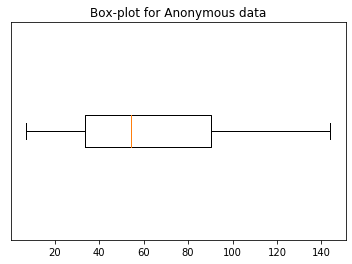

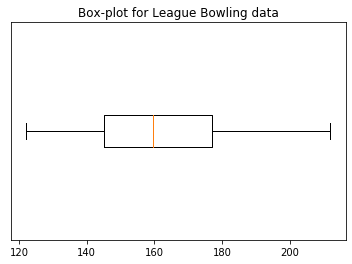

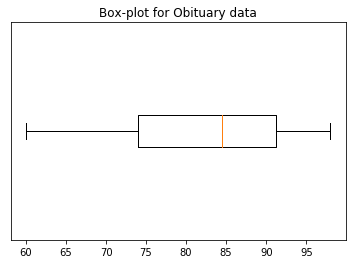

In [51]:
# A short snippet of code showing how to draw boxplots
for i,name in enumerate(["Anonymous", "League Bowling", "Obituary"]):
    plt.figure()
    print(f"{i} and {name}")
    data = datasets[name]
    # draw horizontal box-plots default is vertical
    plt.boxplot(data, vert=False)
    plt.yticks([])
    plt.title(f"Box-plot for {name} data")
    

## Exercise E: Normal data and the empirical rule

The following data-sets represent the ages of participants in 3 different studies. Histogram these datasets given the bins provided and decide which (if any) are approximately normally distributed. Explain your reasons. 

Calculate the mean and standard deviation of each data-set. What can you now say about any of the data-sets? (Hint: consider the empirical rule).

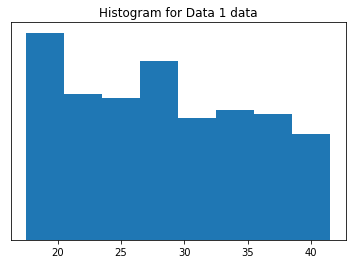

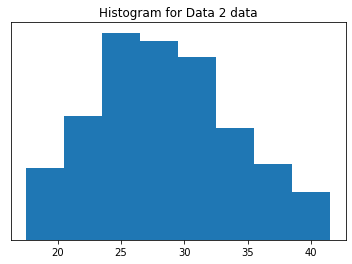

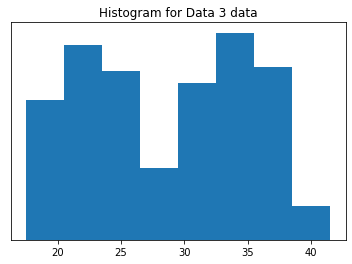

In [54]:
bins = np.linspace(17.5, 41.5, 9)

data1 = np.array([
    19, 34, 25, 34, 23, 20, 24, 31, 34, 34, 28, 27, 32, 39, 31, 19, 24, 21, 19,
    30, 37, 32, 20, 20, 35, 28, 28, 40, 20, 21, 18, 33, 35, 30, 40, 29, 31, 36,
    27, 21, 34, 38, 21, 29, 37, 27, 18, 35, 36, 40, 23, 25, 35, 19, 29, 20, 28,
    26, 30, 28, 19, 37, 37, 36, 40, 37, 19, 19, 40, 36, 22, 24, 38, 21, 40, 19,
    35, 18, 19, 22, 29, 25, 22, 18, 34, 20, 35, 34, 24, 22, 20, 30, 40, 32, 38,
    33, 26, 35, 22, 21, 26, 33, 25, 19, 39, 18, 18, 22, 24, 39, 38, 24, 30, 20,
    21, 23, 19, 23, 28, 20, 35, 25, 30, 22, 22, 27, 19, 26, 39, 18, 20, 19, 27,
    18, 30, 31, 28, 26, 27, 18, 22, 21, 34, 30, 20, 19, 38, 35, 24, 26, 21, 19,
    18, 35, 39, 35, 18, 37, 22, 19, 25, 33, 29, 40, 27, 38, 20, 25, 26, 27, 29,
    18, 37, 25, 19, 34, 39, 21, 32, 29, 23, 31, 36, 27, 32, 25, 29, 40, 28, 31,
    28, 31, 39, 39, 28, 21, 35, 29, 35, 37, 37, 21, 21, 37, 32, 25, 32, 36, 20,
    28, 32, 40, 24, 36, 28, 28, 29, 28, 39, 38, 28, 25, 39, 22, 33, 18, 32, 24,
    28, 27, 34, 22, 32, 29, 36, 23, 38, 34, 39, 19, 20, 18, 21, 36, 29, 40, 26,
    28, 24, 40, 25, 26, 35, 24, 20, 23, 25, 18, 19, 28, 30, 28, 37, 31, 26, 30,
    34, 29, 31, 40, 37, 24, 21, 27, 40, 23, 20, 19, 23, 37, 36, 31, 33, 29, 40
    ])

data2 = np.array([
    42, 25, 25, 19, 43, 27, 18, 24, 43, 12, 30, 24, 22, 32, 20, 29, 25, 23,
    16, 31, 29, 31, 33, 24, 32, 31, 34, 44, 34, 20, 27, 16, 32, 29, 26, 33,
    22, 36, 17, 37, 31, 31, 30, 21, 28, 29, 34, 43, 28, 30, 24, 42, 21, 27,
    31, 26, 39, 39, 30, 26, 21, 35, 28, 27, 22, 25, 25, 26, 30, 27, 12, 20,
    33, 21, 20, 18, 21, 34, 22, 29, 23, 15, 36, 25, 36, 31, 30, 33, 37, 28,
    31, 28, 38, 34, 31, 28, 25, 32, 23, 32, 35, 36, 27, 29, 25, 27, 27, 37,
    25, 24, 23, 26, 24, 30, 28, 34, 47, 30, 37, 39, 20, 29, 26, 27, 34, 26,
    31, 41, 24, 34, 25, 27, 42, 32, 27, 33, 21, 29, 21, 28, 33, 48, 31, 25,
    26, 23, 20, 28, 19, 37, 25, 21, 21, 43, 34, 39, 29, 41, 41, 13, 18, 40,
    32, 18, 27, 25, 30, 35, 20, 17, 23, 36, 35, 28, 28, 27, 23, 25, 28, 26,
    32, 30, 20, 33, 37, 42, 28, 33, 35, 22, 27, 19, 24, 28, 25, 12, 23, 25,
    31, 37, 42, 31, 29, 25, 46, 25, 40, 22, 21, 34, 29, 29, 22, 32, 29, 24,
    31, 19, 34, 26, 31, 38, 38, 30, 26, 25, 22, 16, 36, 29, 38, 29, 31,  9,
    25, 52, 27, 35, 31, 33, 36, 30, 25, 32, 26, 31, 26, 29, 25, 16, 30, 26,
    28, 25, 25, 15, 24, 27, 25, 24, 41, 36, 21, 41, 22, 26, 14, 31, 31, 24,
    30, 22, 30, 34, 21, 16, 22, 40, 34, 29, 20, 19, 30, 29, 28,])

data3 = np.array([
    33, 25, 36, 23, 36, 34, 33, 19, 24, 36, 33, 38, 31, 32, 33, 19, 22, 31, 35,
    34, 24, 36, 23, 36, 39, 25, 21, 38, 20, 22, 19, 25, 32, 18, 36, 30, 37, 32,
    37, 13, 34, 20, 33, 17, 20, 26, 43, 22, 17, 33, 37, 36, 40, 28, 32, 21, 26,
    30, 37, 39, 26, 26, 31, 22, 32, 35, 31, 34, 33, 20, 34, 21, 30, 25, 37, 22,
    22, 22, 19, 22, 25, 24, 22, 27, 23, 37, 32, 36, 22, 19, 31, 33, 19, 33, 24,
    23, 20, 23, 32, 21, 26, 20, 24, 35, 32, 36, 36, 20, 24, 19, 16, 35, 29, 31,
    20, 16, 34, 34, 34, 25, 35, 31, 33, 23, 17, 23, 27, 22, 28, 33, 21, 34, 20,
    34, 19, 27, 35, 34, 35, 25, 30, 26, 20, 33, 34, 37, 37, 36, 26, 27, 32, 36,
    22, 22, 25, 34, 16, 25, 36, 25, 36, 34, 18, 16, 21, 30, 33, 36, 34, 21, 22,
    29, 33, 32, 21, 23, 32, 35, 32, 33, 13, 30, 19, 31, 36, 36, 21, 19, 28, 21,
    33, 30, 25, 38, 36, 20, 33, 31, 24, 31, 32, 32, 23, 29, 29, 25, 21, 32, 17,
    26, 36, 23, 20, 34, 38, 24, 35, 25, 35, 26, 26, 22, 27, 19, 22, 22, 34, 21,
    23, 26, 27, 26, 40, 40, 38, 30, 37, 21, 37, 28, 17, 36, 37, 18, 23, 33, 20,
    33, 20, 32, 24, 20, 16, 23, 41, 28, 19, 39, 23, 26, 39, 22, 25, 35, 27, 21,
    30, 32, 19, 37, 27, 19, 18, 25, 26, 37, 31, 25, 33, 38, 37, 37, 24, 33])

## to complete

datasets2 = dict([("Data 1", data1), ("Data 2", data2), ("Data 3", data3)])

for i,name in enumerate(["Data 1", "Data 2", "Data 3"]):
    plt.figure()
    data = datasets2[name]
    plt.hist(data, bins=bins)
    plt.yticks([])
    plt.title(f"Histogram for {name} data")


# DATA SET 2 APPROX. DISTRIB DUE TO CONCENTRATION IN MIDDLE AND LOWER ON EITHER SIDE OF PEAK (ALMOST SYMMETRICAL)

In [58]:
# DATA 1 MEAN AND SD
d1_mean = np.mean(data1)
print(f"Mean of data 1 = {d1_mean}")
d1_sd = np.std(data1)
print(f"SD of data 1 = {d1_sd}")

print('\n')

# DATA 2 MEAN AND SD
d2_mean = np.mean(data2)
print(f"Mean of data 2 = {d2_mean}")
d2_sd = np.std(data2)
print(f"SD of data 2 = {d2_sd}")

print('\n')

# DATA 3 MEAN AND SD
d3_mean = np.mean(data3)
print(f"Mean of data 3 = {d3_mean}")
d3_sd = np.std(data3)
print(f"SD of data 3 = {d3_sd}")


# ALL DATA SETS HAVE SIMILAR MEANS
# DATA SET 2 HAS A HIGHER STANDARD DEVIATION FROM 1 AND 3 THEREFORE, IT SHOWS DATA IS MORE SPREAD 


Mean of data 1 = 28.294736842105262
SD of data 1 = 6.863900508741791


Mean of data 2 = 28.470175438596492
SD of data 2 = 7.081232049413601


Mean of data 3 = 28.137323943661972
SD of data 3 = 6.715455257657198


## Exercise F: Pearson's r
Pearson's product moment correlation coefficient sometimes just called the r-value or Pearson's r is defined in (Ross, 2017, Sec. 3.7). Your job is to write the function and then apply it to the smoking vs free radicals and school vs pulse-rate data-sets. Compare your answers with the library function <code>numpy.pearsonr</code>.

In [76]:
## write your own function to calculate r (Pearson's product moment correlation coefficient)
## to complete

def ppmcc(data1, data2):
    size = len(data1)
    
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    xy = np.multiply(data1, data2)
    
    xsquared = np.square(data1)
    ysquared = np.square(data2)
    
    xsum = np.sum(data1)
    ysum = np.sum(data2)
    
    xysum = np.sum(xy)
    
    xsquaredsum = np.sum(xsquared)
    ysquaredsum = np.sum(ysquared)
    
    top = size(xysum)-(xsum)(ysum)
    
    bottom1 = size(xsquaredsum)-(xsum**2)
    bottom2 = size(ysquaredsum)-(ysum**2)
    bottom3 = (bottom1*bottom2)**0.5
    
    r_value = top/bottom3
    return r_value
    


[[1.        0.8759639]
 [0.8759639 1.       ]]


Text(0.5, 1.0, 'Scatter')

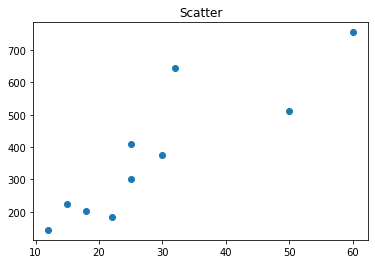

In [82]:
smoking_data = [
    (18,202), (32, 644), (25, 411), (60, 755), (12, 144),
    (25, 302), (50, 512), (15, 223), (22, 183), (30, 375)]

## calculate Pearson's r on the above data and report it
## plot the data too
# to complete 

x = [i[0] for i in smoking_data]
y = [i[1] for i in smoking_data]
# smoking_rval = ppmcc(x,y)
# print(smoking_rval)

z = np.corrcoef(x,y)
print(z)

# SCATTER PLOT FOR SMOKING DATA
plt.figure()
plt.scatter(x,y)
plt.title(f"Scatter")

[[ 1.         -0.76380325]
 [-0.76380325  1.        ]]


Text(0.5, 1.0, 'Scatter')

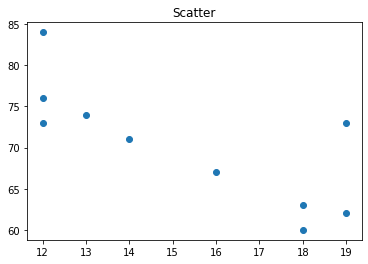

In [83]:
school_vs_pulse_rate = [
  (12, 73), (16, 67), (13, 74), (18, 63), (19, 73),
  (12, 84), (18, 60), (19, 62), (12, 76), (14, 71)]

## calculate Pearson's r on the above data and report it
## plot the data too
## to complete

a = [i[0] for i in school_vs_pulse_rate]
b = [i[1] for i in school_vs_pulse_rate]

c = np.corrcoef(a,b)
print(c)

# SCATTER PLOT FOR SCHOOL DATA
plt.figure()
plt.scatter(a,b)
plt.title(f"Scatter")